### Titanic Project
#Step 1- Data and library importation

In [44]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

In [306]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


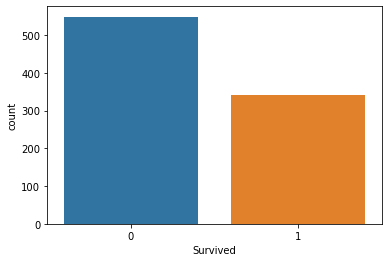

In [8]:
#Step 2 EDA
sns.countplot(data=titanic,x="Survived");

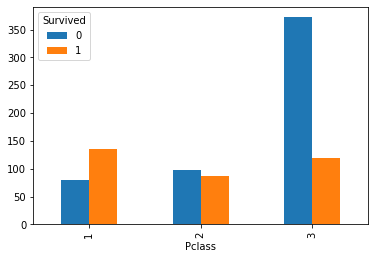

In [6]:
titanic.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar');

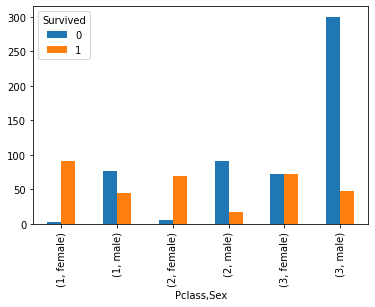

In [9]:
titanic.groupby(['Pclass','Sex', 'Survived']).size().unstack().plot(kind='bar');


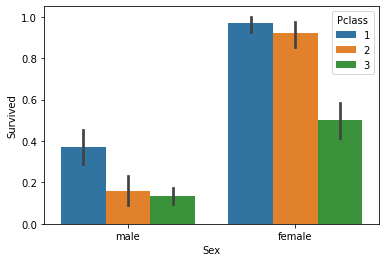

In [10]:
sns.barplot(data=titanic, x="Sex", y="Survived", hue="Pclass");

In [207]:
#titanic['Fare level'] = pd.cut(x=titanic['Fare'], bins=4)

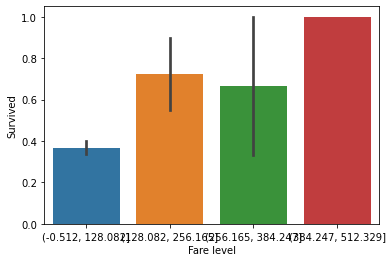

In [208]:
sns.barplot(data=titanic, x="Fare level", y="Survived");

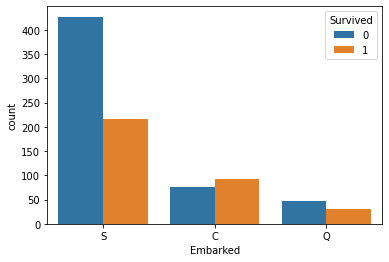

In [13]:
sns.countplot(data=titanic, x="Embarked", hue="Survived");

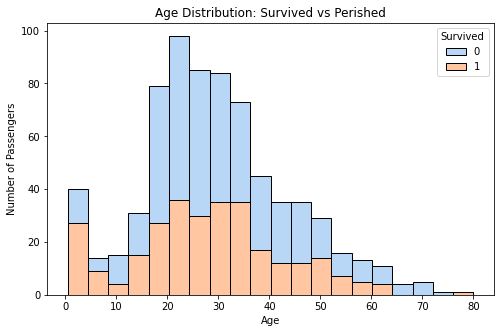

In [14]:
f = plt.figure(figsize=(8,5))
ax = f.add_subplot(1,1,1)


sns.histplot(data=titanic, ax=ax, stat="count", multiple="stack",
             x="Age", kde=False,
             palette="pastel", hue="Survived",
             element="bars", legend=True)
ax.set_title("Age Distribution: Survived vs Perished")
ax.set_xlabel("Age")
ax.set_ylabel("Number of Passengers");

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

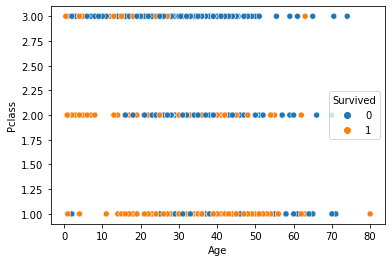

In [23]:
sns.scatterplot(data=titanic, y="Pclass", x="Age", hue="Survived")

In [439]:
#Step 3 - Split the data

df_train, df_test = train_test_split(titanic, test_size=0.2)

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C
522,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S
397,398,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,NaN,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S


In [52]:
#Step 4 - engineering

In [ ]:
dataset = df_train
meanVal = df_train['Age'].mean()
labelz = ['low fare','mid-low fare', 'mid Fare', 'mid-high Fare', 'high Fare']

def myfuntion(dataset, ):
    dataset['Fare range'] = pd.cut(dataset['Fare'], [-1,100,200,300,400,500], labels=labelz)
    gotdummies3 = pd.get_dummies(dataset['Fare range'], drop_first=True)
    dataset = dataset.join(gotdummies3)

    gotdummies1 = pd.get_dummies(dataset['Pclass'], drop_first=True)
    gotdummies2 = pd.get_dummies(dataset['Embarked'], drop_first=True)
    dataset = dataset.join(gotdummies1)
    dataset = dataset.join(gotdummies2)
    
def dataset['Age'] = dataset['Age'].fillna(value=meanVal)

dataset['Cabin'] = dataset['Cabin'].fillna(dataset['Cabin'].mode().iloc[0])
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode().iloc[0])
dataset.rename(columns={2:'Second_Class'}, inplace=True)
dataset.rename(columns={3:'Third_Class'}, inplace=True)
dataset['Sex']=dataset['Sex'].replace({"male":0, "female":1})
dataset.rename(columns={'Sex':'Female'}, inplace=True)
dataset['Family_Size'] = dataset['SibSp'] + dataset['Parch'] + 1
dataset['Fare range'] = pd.cut(dataset['Fare'], bins=5, labels=labels)
dataset.drop(columns=['SibSp','Parch'],inplace=True)  
dataset.rename(columns={2:'Second_Class'}, inplace=True)
dataset.rename(columns={3:'Third_Class'}, inplace=True)
return dataset


  

In [309]:
print(meanVal)

29.570405643738972


In [310]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 711 to 867
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    712 non-null    int64   
 1   Survived       712 non-null    int64   
 2   Pclass         712 non-null    int64   
 3   Name           712 non-null    object  
 4   Female         712 non-null    int64   
 5   Age            712 non-null    float64 
 6   Ticket         712 non-null    object  
 7   Fare           712 non-null    float64 
 8   Cabin          712 non-null    object  
 9   Embarked       712 non-null    object  
 10  Fare range     712 non-null    category
 11  mid-low fare   712 non-null    uint8   
 12  mid Fare       712 non-null    uint8   
 13  mid-high Fare  712 non-null    uint8   
 14  high Fare      712 non-null    uint8   
 15  Second_Class   712 non-null    uint8   
 16  Third_Class    712 non-null    uint8   
 17  Q              712 non-null    ui

In [311]:
df_train=dataset
df_train

,PassengerId,Survived,Pclass,Name,Female,Age,Ticket,Fare,Cabin,Embarked,Fare range,mid-low fare,mid Fare,mid-high Fare,high Fare,Second_Class,Third_Class,Q,S,Family_Size
711,712,0,1,"Klaber, Mr. Herman",0,29.570406,113028,26.5500,C124,S,low fare,0,0,0,0,0,0,0,1,1
438,439,0,1,"Fortune, Mr. Mark",0,64.000000,19950,263.0000,C23 C25 C27,S,mid Fare,0,1,0,0,0,0,0,1,6
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",1,29.570406,386525,16.1000,B96 B98,S,low fare,0,0,0,0,0,1,0,1,2
44,45,1,3,"Devaney, Miss. Margaret Delia",1,19.000000,330958,7.8792,B96 B98,Q,low fare,0,0,0,0,0,1,1,0,1
67,68,0,3,"Crease, Mr. Ernest James",0,19.000000,S.P. 3464,8.1583,B96 B98,S,low fare,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,295,0,3,"Mineff, Mr. Ivan",0,24.000000,349233,7.8958,B96 B98,S,low fare,0,0,0,0,0,1,0,1,1
692,693,1,3,"Lam, Mr. Ali",0,29.570406,1601,56.4958,B96 B98,S,low fare,0,0,0,0,0,1,0,1,1
82,83,1,3,"McDermott, Miss. Brigdet Delia",1,29.570406,330932,7.7875,B96 B98,Q,low fare,0,0,0,0,0,1,1,0,1
428,429,0,3,"Flynn, Mr. James",0,29.570406,364851,7.7500,B96 B98,Q,low fare,0,0,0,0,0,1,1,0,1


#Step 5 - defining X and y variables and running ML methods

In [312]:
df_train, df_val = train_test_split(df_train, test_size=0.1)

In [424]:
X_train = df_train.drop(['Pclass','PassengerId', 'Survived', 'Cabin', 'Name', 'Ticket','Embarked','Fare range', 'mid-low fare', 'mid Fare', 'mid-high Fare' , 'high Fare'], axis=1)
y_train = df_train.loc[:, df_train.columns.isin(['Survived'])]

In [425]:
X_val = df_val.drop(['Pclass','PassengerId', 'Survived', 'Cabin', 'Name', 'Ticket','Embarked','Fare range', 'mid-low fare', 'mid Fare', 'mid-high Fare' , 'high Fare'], axis=1)
y_val = df_val.loc[:, df_val.columns.isin(['Survived'])]

In [426]:
X_train

,Female,Age,Fare,Second_Class,Third_Class,Q,S,Family_Size
74,0,32.000000,56.4958,0,1,0,1,1
175,0,18.000000,7.8542,0,1,0,1,3
274,1,29.570406,7.7500,0,1,1,0,1
704,0,26.000000,7.8542,0,1,0,1,2
428,0,29.570406,7.7500,0,1,1,0,1
...,...,...,...,...,...,...,...,...
317,0,54.000000,14.0000,1,0,0,1,1
264,1,29.570406,7.7500,0,1,1,0,1
143,0,19.000000,6.7500,0,1,1,0,1
789,0,46.000000,79.2000,0,0,0,0,1


In [316]:
X_val

,Female,Age,Second_Class,Third_Class,Q,S,Family_Size
425,0,29.570406,0,1,0,1,1
468,0,29.570406,0,1,1,0,1
146,0,27.000000,0,1,0,1,1
647,0,56.000000,0,0,0,0,1
716,1,38.000000,0,0,0,0,1
...,...,...,...,...,...,...,...
5,0,29.570406,0,1,1,0,1
851,0,74.000000,0,1,0,1,1
82,1,29.570406,0,1,1,0,1
613,0,29.570406,0,1,1,0,1


In [332]:
y_train.values.reshape(-1).shape

(640,)

In [400]:
m = LogisticRegression()
m.fit(X_train, y_train.values.reshape(-1))

LogisticRegression()

In [401]:
m.coef_

array([[ 2.53735289, -0.03860663, -0.99249536, -2.14988206, -0.09059832,
        -0.4627092 , -0.14439669]])

In [403]:
m.intercept_

array([1.61095717])

In [336]:
m.predict(X_train)

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [404]:
m.score(X_train, y_train)

0.8078125

In [405]:
m.score(X_val, y_val)

0.7916666666666666

In [406]:
ypred = m.predict(X_train)

In [407]:
from sklearn.metrics import accuracy_score
accuracy_score(ypred,y_train)

0.8078125

In [427]:
from sklearn.ensemble import RandomForestClassifier
m_rf = RandomForestClassifier(max_depth=4, n_estimators=100)
m_rf.fit(X_train, y_train.values.reshape(-1))

RandomForestClassifier(max_depth=4)

In [428]:
ypred_rf = m_rf.predict(X_train)

In [429]:
m_rf.score(X_val,y_val)

0.8055555555555556

In [430]:
m_rf.score(X_train,y_train.values.reshape(-1))

0.8484375

In [240]:
accuracy_score(ypred_rf, y_train)

0.85625

In [493]:
# Engineering the test dataframe


In [355]:

meanVal = df_train['Age'].mean()
labelz = ['low fare','mid-low fare', 'mid Fare', 'mid-high Fare', 'high Fare']

df_test['Fare range'] = pd.cut(df_test['Fare'], [-1, 100, 200, 300, 400, 500], labels=labelz)
gotdummies3 = pd.get_dummies(df_test['Fare range'], drop_first=True)
df_test = df_test.join(gotdummies3)

gotdummies1 = pd.get_dummies(df_test['Pclass'], drop_first=True)
gotdummies2 = pd.get_dummies(df_test['Embarked'], drop_first=True)
df_test = df_test.join(gotdummies1)
df_test = df_test.join(gotdummies2)
df_test['Age'] = df_test['Age'].fillna(value=meanVal)
df_test['Cabin'] = df_test['Cabin'].fillna(df_test['Cabin'].mode().iloc[0])
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode().iloc[0])
df_test.rename(columns={2:'Second_Class'}, inplace=True)
df_test.rename(columns={3:'Third_Class'}, inplace=True)
df_test['Sex']=df_test['Sex'].replace({"male":0, "female":1})
df_test.rename(columns={'Sex':'Female'}, inplace=True)
df_test['Family_Size'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test['Fare range'] = pd.cut(df_test['Fare'], bins=5, labels=labels)
df_test.drop(columns=['SibSp','Parch'],inplace=True)  
df_test.rename(columns={2:'Second_Class'}, inplace=True)
df_test.rename(columns={3:'Third_Class'}, inplace=True)

In [356]:
df_test

,PassengerId,Survived,Pclass,Name,Female,Age,Ticket,Fare,Cabin,Embarked,Fare range,mid-low fare,mid Fare,mid-high Fare,high Fare,Second_Class,Third_Class,Q,S,Family_Size
598,599,0,3,"Boulos, Mr. Hanna",0,29.670657,2664,7.2250,C22 C26,C,low fare,0,0,0,0,0,1,0,0,1
487,488,0,1,"Kent, Mr. Edward Austin",0,58.000000,11771,29.7000,B37,C,low fare,0,0,0,0,0,0,0,0,1
838,839,1,3,"Chip, Mr. Chang",0,32.000000,1601,56.4958,C22 C26,S,mid-low fare,0,0,0,0,0,1,0,1,1
393,394,1,1,"Newell, Miss. Marjorie",1,23.000000,35273,113.2750,D36,C,mid Fare,1,0,0,0,0,0,0,0,2
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",1,44.000000,111361,57.9792,B18,C,mid-low fare,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,312,1,1,"Ryerson, Miss. Emily Borie",1,18.000000,PC 17608,262.3750,B57 B59 B63 B66,C,high Fare,0,1,0,0,0,0,0,0,5
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",1,63.000000,13502,77.9583,D7,S,mid-low fare,0,0,0,0,0,0,0,1,2
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",1,51.000000,13502,77.9583,D11,S,mid-low fare,0,0,0,0,0,0,0,1,2
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",1,2.000000,347082,31.2750,C22 C26,S,low fare,0,0,0,0,0,1,0,1,7


In [357]:
X_test = df_test.drop(['Pclass','PassengerId', 'Survived', 'Cabin', 'Name', 'Fare','Ticket','Embarked','Fare range'], axis=1)
y_test = df_test.loc[:, df_test.columns.isin(['Survived'])]

In [358]:
X_test

,Female,Age,mid-low fare,mid Fare,mid-high Fare,high Fare,Second_Class,Third_Class,Q,S,Family_Size
598,0,29.670657,0,0,0,0,0,1,0,0,1
487,0,58.000000,0,0,0,0,0,0,0,0,1
838,0,32.000000,0,0,0,0,0,1,0,1,1
393,1,23.000000,1,0,0,0,0,0,0,0,2
523,1,44.000000,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
311,1,18.000000,0,1,0,0,0,0,0,0,5
275,1,63.000000,0,0,0,0,0,0,0,1,2
765,1,51.000000,0,0,0,0,0,0,0,1,2
119,1,2.000000,0,0,0,0,0,1,0,1,7


In [359]:
X_train

,Female,Age,mid-low fare,mid Fare,mid-high Fare,high Fare,Second_Class,Third_Class,Q,S,Family_Size
74,0,32.000000,0,0,0,0,0,1,0,1,1
175,0,18.000000,0,0,0,0,0,1,0,1,3
274,1,29.570406,0,0,0,0,0,1,1,0,1
704,0,26.000000,0,0,0,0,0,1,0,1,2
428,0,29.570406,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
317,0,54.000000,0,0,0,0,1,0,0,1,1
264,1,29.570406,0,0,0,0,0,1,1,0,1
143,0,19.000000,0,0,0,0,0,1,1,0,1
789,0,46.000000,0,0,0,0,0,0,0,0,1


In [361]:
m_rf.score(X_test,y_test)

0.8268156424581006

In [360]:
m.score(X_test,y_test)

0.7877094972067039

/Users/tiagonascimento/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


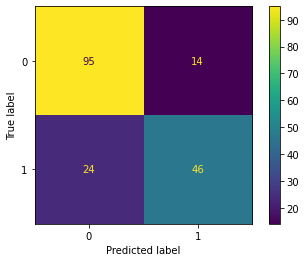

In [432]:
from sklearn import metrics
metrics.plot_confusion_matrix(m, X_test, y_test)

/Users/tiagonascimento/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


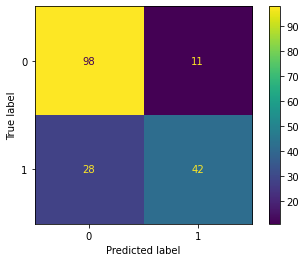

In [434]:
metrics.plot_confusion_matrix(m_rf, X_test, y_test)

/Users/tiagonascimento/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


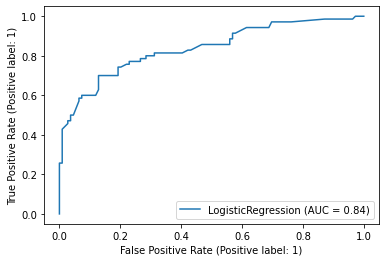

In [433]:
metrics.plot_roc_curve(m, X_test, y_test)

/Users/tiagonascimento/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


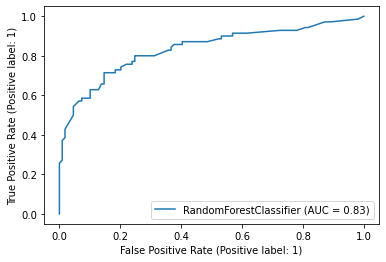

In [437]:
metrics.plot_roc_curve(m_rf, X_test, y_test)

In [ ]:
# Extra: where is Rose and Jack?

In [429]:
titanic[titanic['Name'].str.contains("Dewitt")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare level


In [420]:
titanic[titanic['Name'].str.contains("Jack")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare level
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C,"(-0.512, 170.776]"


In [381]:
test_final=pd.read_csv('Kaggle titanic test.csv')

In [382]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [383]:
test_final['Fare'] = test_final['Fare'].fillna(test_final['Fare'].mode().iloc[0])
test_final['Fare range'] = pd.cut(test_final['Fare'], [-1, 100, 200, 300, 400, 500], labels=labelz)
gotdummies3 = pd.get_dummies(test_final['Fare range'], drop_first=True)
test_final = test_final.join(gotdummies3)

gotdummies1 = pd.get_dummies(test_final['Pclass'], drop_first=True)
gotdummies2 = pd.get_dummies(test_final['Embarked'], drop_first=True)
test_final = test_final.join(gotdummies1)
test_final = test_final.join(gotdummies2)
test_final['Age'] = test_final['Age'].fillna(value=meanVal)
test_final['Cabin'] = test_final['Cabin'].fillna(test_final['Cabin'].mode().iloc[0])
test_final['Embarked'] = test_final['Embarked'].fillna(test_final['Embarked'].mode().iloc[0])
test_final.rename(columns={2:'Second_Class'}, inplace=True)
test_final.rename(columns={3:'Third_Class'}, inplace=True)
test_final['Sex']=test_final['Sex'].replace({"male":0, "female":1})
test_final.rename(columns={'Sex':'Female'}, inplace=True)
test_final['Family_Size'] = test_final['SibSp'] + test_final['Parch'] + 1
test_final['Fare range'] = pd.cut(test_final['Fare'], bins=5, labels=labels)
test_final.drop(columns=['SibSp','Parch'],inplace=True)  
test_final.rename(columns={2:'Second_Class'}, inplace=True)
test_final.rename(columns={3:'Third_Class'}, inplace=True)

In [374]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    418 non-null    int64   
 1   Pclass         418 non-null    int64   
 2   Name           418 non-null    object  
 3   Female         418 non-null    int64   
 4   Age            418 non-null    float64 
 5   Ticket         418 non-null    object  
 6   Fare           418 non-null    float64 
 7   Cabin          418 non-null    object  
 8   Embarked       418 non-null    object  
 9   Fare range     418 non-null    category
 10  mid-low fare   418 non-null    uint8   
 11  mid Fare       418 non-null    uint8   
 12  mid-high Fare  418 non-null    uint8   
 13  high Fare      418 non-null    uint8   
 14  Second_Class   418 non-null    uint8   
 15  Third_Class    418 non-null    uint8   
 16  Q              418 non-null    uint8   
 17  S              418 non-null    uint

In [432]:
X_test_final = test_final.drop(['Pclass','mid-low fare', 'mid Fare', 'mid-high Fare' , 'high Fare','PassengerId', 'Cabin', 'Name', 'Ticket','Embarked','Fare range'], axis=1)
y_test_final = test_final.loc[:, test_final.columns.isin(['Survived'])]

In [433]:
X_test_final

,Female,Age,Fare,Second_Class,Third_Class,Q,S,Family_Size
0,0,34.500000,7.8292,0,1,1,0,1
1,1,47.000000,7.0000,0,1,0,1,2
2,0,62.000000,9.6875,1,0,1,0,1
3,0,27.000000,8.6625,0,1,0,1,1
4,1,22.000000,12.2875,0,1,0,1,3
...,...,...,...,...,...,...,...,...
413,0,29.670657,8.0500,0,1,0,1,1
414,1,39.000000,108.9000,0,0,0,0,1
415,0,38.500000,7.2500,0,1,0,1,1
416,0,29.670657,8.0500,0,1,0,1,1


In [434]:
predictions = m_rf.predict(X_test_final)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [435]:
submission = pd.DataFrame({'PassengerId':test_final['PassengerId'],'Survived':predictions})

In [436]:
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [437]:
submission.set_index('PassengerId')

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [438]:
filename = 'Titanic Predictions 4.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions 4.csv
